In [1]:
from src.analysis_helpers import get_data2, analysis_regression_performance_plotly,analysis_regression_rel_error_plotly
import numpy as np

src.analysis_helpers


In [3]:
analysis_regression_rel_error_plotly("Rastrigin_dim_10", means=True)

{'0419_2301', '0419_2303', '0419_2302'}
Data collected from: 19/04 23:01, 19/04 23:03, 19/04 23:02 0419_2301 --- 0419_2303 --- 0419_2302


In [22]:
def colorA(name):
    if "Mixture" in name:
        return "yellow"
    if "Gaussian" in name:
        return "blue"
    if "numpyro" in name:
        return "red"
    if "BOHAMIANN" in name:
        return "green"
    return "black"

def lsA(name):
    if "-" in name:
        return "--"
    else:
        return "-"

def analysis_regression_performance(problem=  "Rosenbrock_dim_10", use_exact_name= False, print_file_paths=True):
    data_list,name_list, problem_name, file_path_list = get_data(problem, use_exact_name=use_exact_name)
    fig, ax = plt.subplots(1,2, figsize=(12, 8))
    for data, name in zip(data_list,name_list):
        ax[0].plot(data["n_train_points_list"], data["mean_abs_pred_error"], color =colorA(name), ls=lsA(name), label=name)
    #fig, ax = plt.subplots()
    for data, name in zip(data_list,name_list):
        ax[1].plot(data["n_train_points_list"], data["mean_uncertainty_quantification"],color =colorA(name), ls=lsA(name) , label=name)
    #ax[1].legend()

    ax[0].set_title("mean_abs_pred_error")
    ax[1].set_title("mean_uncertainty_quantification")
    print(problem_name)
    if print_file_paths:
        print(file_path_list)
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())


/tmp/ipykernel_145989/1779657594.py:42: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



TypeError: unsupported operand type(s) for +: 'float' and 'list'

In [24]:
analysis_regression_performance_plotly("Rosenbrock_dim_2")

ValueError: 
    Invalid value of type 'builtins.str' received for the 'dash' property of scatter.line
        Received value: '-'

    The 'dash' property is an enumeration that may be specified as:
      - One of the following dash styles:
            ['solid', 'dot', 'dash', 'longdash', 'dashdot', 'longdashdot']
      - A string containing a dash length list in pixels or percentages
            (e.g. '5px 10px 2px 2px', '5, 10, 2, 2', '10% 20% 40%', etc.)


Zirilli dim 2
{'0416_1204', '0416_1203'}


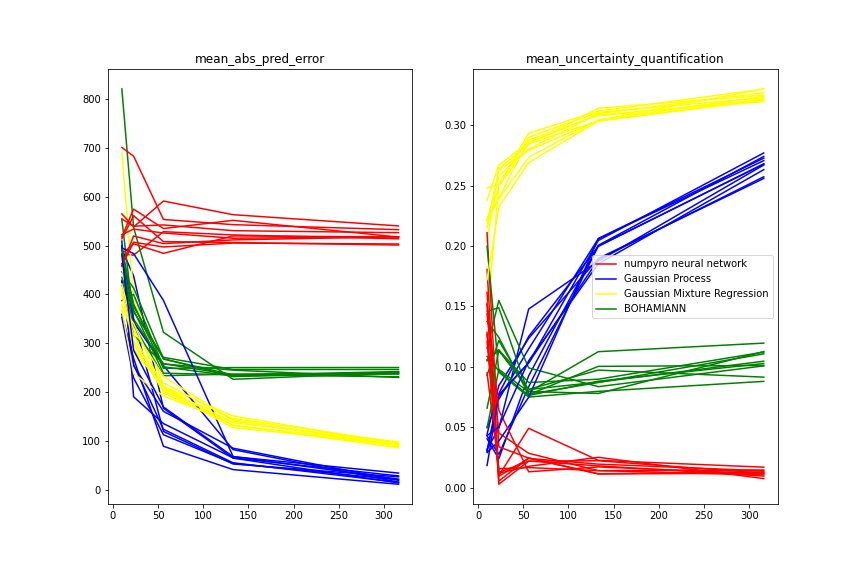

In [102]:
analysis_regression_performance("Zi")

Weierstrass dim 2
{'0416_1204', '0416_1203'}


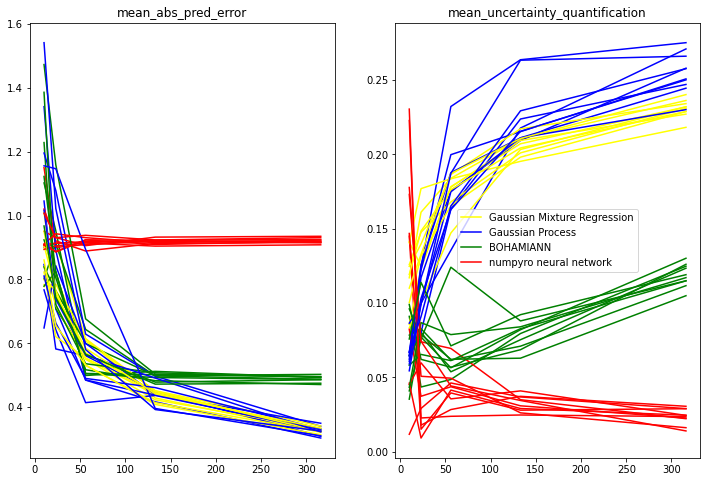

In [89]:
analysis_regression_performance("Wei")

Hartmann6 dim 6
{'0418_0840'}


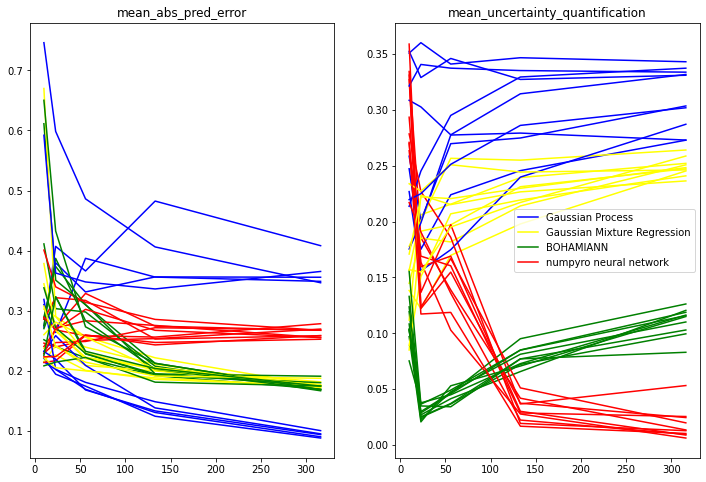

In [83]:
analysis_regression_performance("Hartmann6") #Whitley #Ackley01, #Cola, #Corana, #Hartmann6 #Hartmann3

Step2 dim 10
{'0419_0927', '0419_1058', '0419_0950', '0419_0946', '0419_1042', '0419_0947', '0419_0918', '0419_1057'}


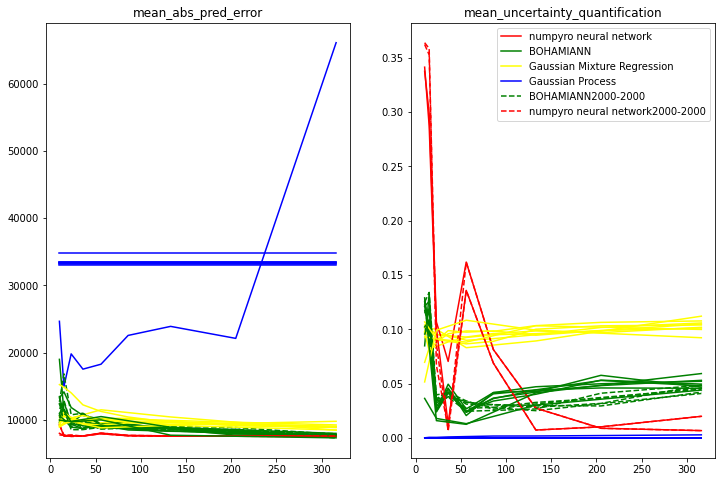

In [95]:
#Whitley #Ackley01, #Cola, #Corana, #Hartmann6 #Hartmann3
analysis_regression_performance("Step2_dim_10", use_exact_name=True) 
plt.show()